In [19]:
import tensorflow as tf

### Loading the dataset

In [20]:
mnist = tf.keras.datasets.mnist

#### dividing into train and test datasets

In [21]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [22]:
#seeing the shape of the dataset, how many there is, the size of each
x_train.shape

(60000, 28, 28)

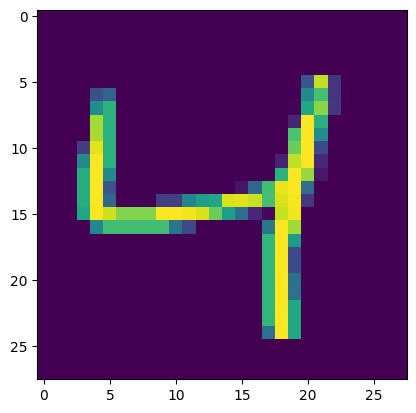

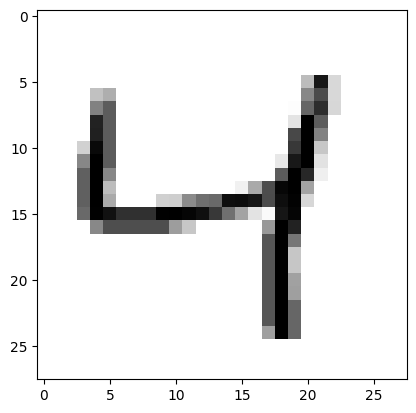

In [23]:
import matplotlib.pyplot as plt 

#check the graph, to see how the data looks like
plt.imshow(x_train[2])
plt.show()
plt.imshow(x_train[2], cmap = plt.cm.binary)

### Checking the values of each pixel 
### before normalization

In [24]:
print (x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [25]:
# we realize that they are twisted, the black color is represented by numbers next to 255 and the white color is represented by 0

### Normalizing the data

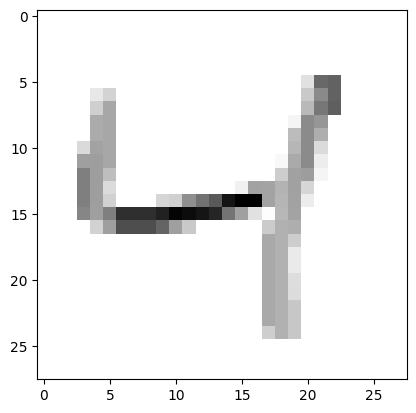

In [26]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

plt.imshow(x_train[2], cmap = plt.cm.binary)

In [27]:
#after the normalization, all the values got between 0 and 1, because they were divided by 255

print(x_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [28]:
#the y_train has the labels of each image/number
print(y_train[2])


4


### Resizing the image to make it suitable for apply Convulotuion operation

In [29]:
import numpy as np 

IMG_SIZE=28

x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Training Samples new dimension", x_trainr.shape)
print("Testing Samples new dimension", x_testr.shape)


Training Samples new dimension (60000, 28, 28, 1)
Testing Samples new dimension (10000, 28, 28, 1)


### Creating a Deep Neural Network
### Starting with the training 

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [31]:
# creating a neural network now - linear stack of layers
model = Sequential()

### FALTA EXPLICAR AS LINHAS ###

#first convolution layer

model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))#64 = number of filters(trying yo detect especific patterns) that this layer will have, 3,3 is the shape
model.add(Activation("relu")) # turns into 0 all the negative values and put the positives with the same value -> help the model to learn complex things
model.add(MaxPooling2D(pool_size=(2,2))) #reduces the image

#2nd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully connected layer 1
model.add(Flatten()) # transforms the output of the layers into one list - vector
model.add(Dense(64)) #adds a fully connected dense layer with 64 neurons
model.add(Activation("relu"))

##Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

##Last fully connected layer 3
model.add(Dense(10))
model.add(Activation("softmax")) #transform the values into probabilities 

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [34]:
## calculates the error function, choose the weights, see the accuracy of the model
model.compile(loss ="sparse_categorical_crossentropy", optimizer ="adam", metrics=["accuracy"])

In [35]:
# training the model, input conjunt, labels conjunt, how many times it will see the data, reserve 30% of the data train to validation 
model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.7723 - loss: 0.6662 - val_accuracy: 0.9558 - val_loss: 0.1416
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9659 - loss: 0.1130 - val_accuracy: 0.9677 - val_loss: 0.1102
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9769 - loss: 0.0763 - val_accuracy: 0.9746 - val_loss: 0.0839
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9822 - loss: 0.0572 - val_accuracy: 0.9805 - val_loss: 0.0637
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9852 - loss: 0.0467 - val_accuracy: 0.9828 - val_loss: 0.0599


In [37]:
## Evaluateing on testing data set MNIT
test_loss, test_acc, = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9820 - loss: 0.0688
Test loss on 10,000 test samples 0.05678583309054375
Validation Accuracy on 10,000 test samples 0.9847000241279602


In [39]:
predictions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [40]:
print(predictions)

[[1.25084762e-06 5.34471219e-05 6.39174868e-06 ... 9.99931276e-01
  8.30279419e-08 5.97313692e-06]
 [3.90265632e-04 3.13512464e-05 9.99548972e-01 ... 5.25937139e-07
  1.48169519e-07 1.08725375e-08]
 [8.57660887e-10 9.99999702e-01 1.57354929e-09 ... 2.41423606e-07
  4.23380397e-09 7.73507924e-09]
 ...
 [2.47534823e-11 3.31553201e-06 4.95268493e-10 ... 8.68781598e-08
  1.50476853e-06 3.29834734e-06]
 [7.91830735e-06 1.02943886e-07 1.39901504e-08 ... 6.71384782e-07
  2.17293564e-04 9.78009848e-06]
 [2.26553111e-05 5.19593790e-08 5.69515032e-06 ... 5.75731640e-08
  3.16300998e-06 4.33765237e-08]]


In [41]:
print(np.argmax(predictions[0]))

7


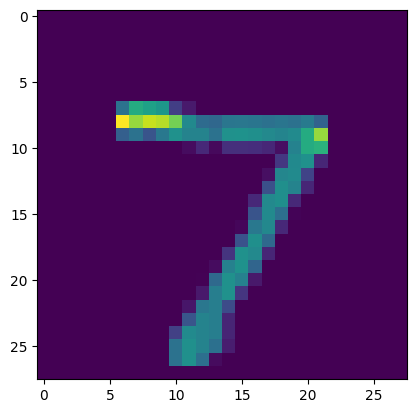

In [42]:
plt.imshow(x_test[0])

In [43]:
print(np.argmax(predictions[29]))

1


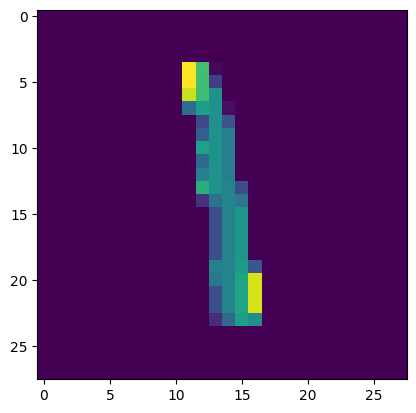

In [44]:
plt.imshow(x_test[29])

In [54]:
import cv2 

In [55]:
img = cv2.imread('test.png')

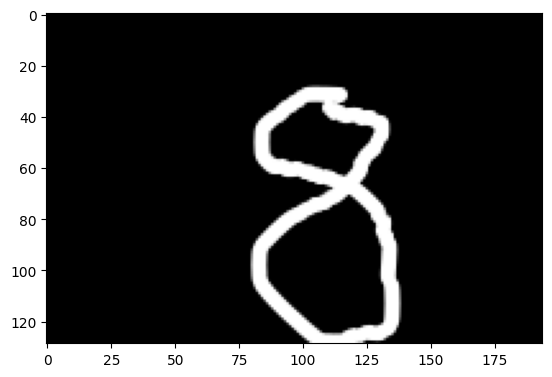

In [56]:
plt.imshow(img)

In [58]:
img.shape

(129, 194, 3)

In [61]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [62]:
gray.shape

(129, 194)

In [63]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [64]:
resized.shape

(28, 28)

In [65]:
newimg = tf.keras.utils.normalize (resized, axis =1)

In [66]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [67]:
newimg.shape

(1, 28, 28, 1)

In [68]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [69]:
print(np.argmax(predictions))

8
